## Modularize this code

1. Review the Class objects defined in src/zootopia3/shapes
2. Create a function in src/zootopia3/simulate.py that simulates data for 1 shape
3. Modify this notebook to invoke the function

In [1]:
import numpy as np
from numpy.dtypes import StringDType
from random import randint
import matplotlib.pyplot as plt
from zootopia3 import *

In [46]:
def perturb_color(rgb_color, magnitude):
    assert magnitude < 100
    r = rgb_color[0]
    g = rgb_color[1]
    b = rgb_color[2]
    if r == 255:
        r -= randint(0, magnitude)
    if g == 255:
        g -= randint(0, magnitude)
    if b == 255:
        b -= randint(0, magnitude)
    if r == 0:
        r += randint(0, magnitude)
    if g == 0:
        g += randint(0, magnitude)
    if b == 0:
        b += randint(0, magnitude)
    return (r, g, b)

def perturb_shade(rgb_color, magnitude, minus = False):
    assert magnitude < 100
    r = rgb_color[0]
    g = rgb_color[1]
    b = rgb_color[2]
    if minus:
        r -= randint(0, magnitude)
        g -= randint(0, magnitude)
        b -= randint(0, magnitude)
    else:
        r += randint(0, magnitude)
        g += randint(0, magnitude)
        b += randint(0, magnitude)
    return (r, g, b) 

In [ ]:
image_width = 224
image_height = 224
min_x = 10
max_x = 40
num_shape_examples = 20
num_noise_examples = 100

colors_dict = {
    "yellow": (255, 255, 0),
    "blue": (0, 0, 255),
    "red": (255, 0, 0),
    "green": (0, 255, 0),
    "purple": (255, 0, 255),
    "cyan": (0, 255, 255),
}

magnitude = 90
magnitude = 90

In [50]:
num_examples = (num_shape_examples * 8 * 4) + num_noise_examples
target_color = np.empty(num_examples, dtype=StringDType)
target_shape = np.empty(num_examples, dtype=StringDType)
images = np.zeros(
    (num_examples,
        224,
        224,
        3,
    ),
    dtype = np.uint8
)

In [ ]:
itr = 0

for _ in range(num_shape_examples):

    # circle
    for rgb_name, rgb_color in colors_dict.items():
        radius = randint(min_x * 2, max_x * 2) // 2
        rgb_color_rand = perturb_color(rgb_color, magnitude)
        shp = Shape('circle', image_width, image_height, radius, rgb_color_rand, rgb_name)
        images[itr,] = shp.get_image()
        target_color[itr] = rgb_name
        target_shape[itr] = 'circle'
        itr += 1

    radius = randint(min_x * 2, max_x * 2) // 2
    rgb_shade_rand = perturb_shade((0,0,0), magnitude)
    shp = Shape('circle', image_width, image_height, radius, rgb_shade_rand, 'black', 
    )
    images[itr,] = shp.get_image()
    target_color[itr] = 'black'
    target_shape[itr] = 'circle'
    itr += 1

    radius = randint(min_x * 2, max_x * 2) // 2
    rgb_shade_rand = perturb_shade((255,255,255), magnitude, True)
    shp = Shape('circle', image_width, image_height, radius, rgb_shade_rand, 'white', 
    )
    images[itr,] = shp.get_image()
    target_color[itr] = 'white'
    target_shape[itr] = 'circle'
    itr += 1

    # rectangle
    for rgb_name, rgb_color in colors_dict.items():
        height = randint(min_x , max_x)
        width = randint(min_x , max_x)
        rgb_color_rand = perturb_color(rgb_color, magnitude)
        shp = Shape('rectangle', image_width, image_height, width, height, rgb_color_rand, rgb_name)
        images[itr,] = shp.get_image()
        target_color[itr] = rgb_name
        target_shape[itr] = 'rectangle'
        itr += 1

    height = randint(min_x , max_x)
    width = randint(min_x , max_x)
    rgb_shade_rand = perturb_shade((0,0,0), magnitude)
    shp = Shape('rectangle', image_width, image_height, width, height, rgb_shade_rand, 'black', 
    )
    images[itr,] = shp.get_image()
    target_color[itr] = 'black'
    target_shape[itr] = 'rectangle'
    itr += 1

    height = randint(min_x , max_x)
    width = randint(min_x , max_x)
    rgb_shade_rand = perturb_shade((255,255,255), magnitude, True)
    shp = Shape('rectangle', image_width, image_height, width, height, rgb_shade_rand, 'white', 
    )
    images[itr,] = shp.get_image()
    target_color[itr] = 'white'
    target_shape[itr] = 'rectangle'
    itr += 1

    # diamond
    for rgb_name, rgb_color in colors_dict.items():
        height = randint(min_x , max_x)
        width = randint(min_x , max_x)
        rgb_color_rand = perturb_color(rgb_color, magnitude)
        shp = Shape('diamond', image_width, image_height, width, height, rgb_color_rand, rgb_name)
        images[itr,] = shp.get_image()
        target_color[itr] = rgb_name
        target_shape[itr] = 'diamond'
        itr += 1

    height = randint(min_x , max_x)
    width = randint(min_x , max_x)
    rgb_shade_rand = perturb_shade((0,0,0), magnitude)
    shp = Shape('diamond', image_width, image_height, width, height, rgb_shade_rand, 'black', 
    )
    images[itr,] = shp.get_image()
    target_color[itr] = 'black'
    target_shape[itr] = 'diamond'
    itr += 1

    height = randint(min_x , max_x)
    width = randint(min_x , max_x)
    rgb_shade_rand = perturb_shade((255,255,255), magnitude, True)
    shp = Shape('diamond', image_width, image_height, width, height, rgb_shade_rand, 'white', 
    )
    images[itr,] = shp.get_image()
    target_color[itr] = 'white'
    target_shape[itr] = 'diamond'
    itr += 1

    # triangle
    for rgb_name, rgb_color in colors_dict.items():
        height = randint(min_x , max_x)
        width = randint(min_x , max_x)
        upside_down = randint(0,1)
        sideways = randint(0,1)
        rgb_color_rand = perturb_color(rgb_color, magnitude)
        shp = Shape('triangle', image_width, image_height, width, height, rgb_color_rand, rgb_name,
            upside_down, 
            sideways
        )
        images[itr,] = shp.get_image()
        target_color[itr] = rgb_name
        target_shape[itr] = 'triangle'
        itr += 1

    height = randint(min_x , max_x)
    width = randint(min_x , max_x)
    upside_down = randint(0,1)
    sideways = randint(0,1)
    rgb_shade_rand = perturb_shade((0,0,0), magnitude)
    shp = Shape('triangle', image_width, image_height, width, height, rgb_shade_rand, 'black', 
        upside_down, 
        sideways
    )
    images[itr,] = shp.get_image()
    target_color[itr] = 'black'
    target_shape[itr] = 'triangle'
    itr += 1

    height = randint(min_x , max_x)
    width = randint(min_x , max_x)
    upside_down = randint(0,1)
    sideways = randint(0,1)
    rgb_shade_rand = perturb_shade((255,255,255), magnitude, True)
    shp = Shape('triangle', image_width, image_height, width, height, rgb_shade_rand, 'white', 
        upside_down, 
        sideways
    )
    images[itr,] = shp.get_image()
    target_color[itr] = 'white'
    target_shape[itr] = 'triangle'
    itr += 1


for _ in range(num_noise_examples):
    img_noise = np.random.randint(0, 256, (224, 224, 3), dtype=np.uint8)
    images[itr,] = img_noise
    target_color[itr] = 'noise'
    target_shape[itr] = 'noise'
    itr += 1


cyan diamond


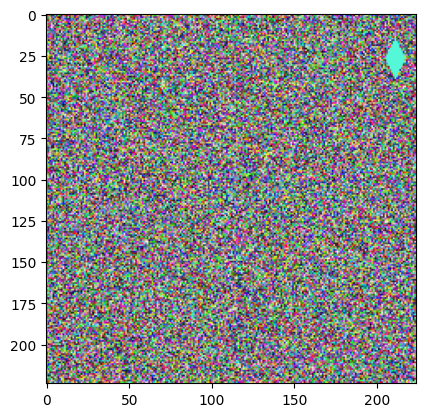

In [ ]:
# plot examples
idx = randint(0, num_examples - 1)
print(f'{target_color[idx]} {target_shape[idx]}')
plt.imshow(images[idx])
plt.show()

In [82]:
# saving the data
np.savetxt('target_color.txt', target_color, fmt='%s')
np.savetxt('target_shape.txt', target_shape, fmt='%s')
np.save('images.npy', images)